# Examen Uziel Barrio González
## Prueba: Entender si en la siguiente semana el precio de una acción subirá o bajará

In [1]:
# @title 1: Cargando los paquetes necesarios

# Cargando los paquetes necesarios
   #DESMARCAR SI ES NECESARIO PARA USAR LOS PAQUETES
#!pip install yfinance
import yfinance as yf
import pandas as pd

In [2]:
# @title 2: Descargar la información y análisis inicial
## Me gustaría pronósticar el valor SOXL, esto es importante porque multiplica x3 el valor de los semiconductores.
## Crear un objeto Ticker para este ETF
#main_df = yf.Ticker("SOXL")

# Obtener el historial de precios de este activo (en dólares, para la máxima de información que se tenga disponible)
#main_df = main_df.history(period="max")  # Puedes cambiar el periodo, por ejemplo, "1d", "5d", "1mo", "3mo", "6mo", "1y", "2y", "5y", "10y", "ytd", "max"


## Asegurarse de que el índice es de tipo DateTime
#main_df.index = pd.to_datetime(main_df.index)

## Crear nuevas columnas de día, mes, año y día de la semana; extrayendo la información del índice
#main_df['Day'] = main_df.index.day
#main_df['Month'] = main_df.index.month
#main_df['Year'] = main_df.index.year
#main_df['DayOfWeek'] = main_df.index.day_name()

#Ahora guardo el main_dataframe en un CSV
#from google.colab import drive
#drive.mount('drive')

#main_df.to_csv('data.csv')
#!cp data.csv "drive/My Drive/"

# Mostrando las principales estadísticas de nuestra variable. Note que tenemos +3500 observaciones
#main_df.describe()

In [3]:
#Cargando la información que previamente fue cargada en GITHUB

link_github = "https://raw.githubusercontent.com/uzbalz/SOXL-forecast/a0d24435a443d1e4accf92ebea1a0df0fbbaf4e1/data.csv"

main_df = pd.read_csv(link_github, index_col=0)  # Assuming the first column is the index

# Convert the index to datetime
main_df.index = pd.to_datetime(main_df.index, errors='coerce')

# Create a datetime column by combining year, month, and day
main_df['date'] = pd.to_datetime(main_df[['Year', 'Month', 'Day']])

# Set the new datetime column as the index
main_df.set_index('date', inplace=True)

# Drop the original year, month, and day columns if needed
main_df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

# Check the type of the index
print(type(main_df.index))

main_df.head()


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,DayOfWeek
date,,,,,,,,,
2010-03-11,0.591038,0.607596,0.591038,0.607596,3702000,0.0,0.0,0.0,Thursday
2010-03-12,0.608056,0.612042,0.592571,0.592571,4548000,0.0,0.0,0.0,Friday
2010-03-15,0.580612,0.586898,0.564974,0.573866,534000,0.0,0.0,0.0,Monday
2010-03-16,0.581072,0.621088,0.580152,0.620474,1260000,0.0,0.0,0.0,Tuesday
2010-03-17,0.643932,0.650371,0.631207,0.642859,2610000,0.0,0.0,0.0,Wednesday


In [4]:
# Estudiar este ETF es de alta relevancia desde que es posible que de rentabilidades anuales medias de 70% o más
y_soxl_df =main_df.resample('Y').last()
y_soxl_df = y_soxl_df.filter(regex=r'^Close')

y_soxl_df["TasaAnual"] = y_soxl_df['Close'].diff() / y_soxl_df['Close'].shift(1) * 100

y_soxl_df.describe()


,Close,TasaAnual
count,15.000000,14.000000
mean,15.711782,75.145438
std,21.159882,100.664300
min,0.398126,-85.663098
25%,1.350375,-14.536053
50%,5.405005,86.143992
75%,24.215975,137.148909
max,66.738655,231.826594


In [5]:
# Filtrar las filas donde el índice es mayor que '2019-06-01 23:00' y mostrar las primeras filas
filtered_soxl_df = main_df.loc[main_df.index > '2019-06-01']
filtered_soxl_df = filtered_soxl_df.loc[filtered_soxl_df.index < '2024-06-20']

# Guardamos la información de los últimos 5 años por considerar que son los relevantes con suficiente memoria
filtered_soxl_df = filtered_soxl_df.drop(columns = ["Dividends", "Stock Splits", "Capital Gains"])
filtered_soxl_df['Volume'] = filtered_soxl_df['Volume'] / 1e6  #Será mejor interpretar en millones
print("Celdas de relevancia (a partir de 2019- hace 5 años)")
filtered_soxl_df.head()


Celdas de relevancia (a partir de 2019- hace 5 años)


,Open,High,Low,Close,Volume,DayOfWeek
date,,,,,,
2019-06-03,7.147137,7.343394,6.833256,6.954780,23.4105,Monday
2019-06-04,7.343394,7.852233,7.141938,7.837286,32.1510,Tuesday
2019-06-05,8.095281,8.101130,7.378487,7.681321,25.5330,Wednesday
2019-06-06,7.678721,8.082933,7.629333,8.000401,14.1765,Thursday
2019-06-07,8.056939,8.323381,8.019897,8.251247,14.0910,Friday


Desde los últimos 5 años, el valor del índice ha crecido 835.43 %


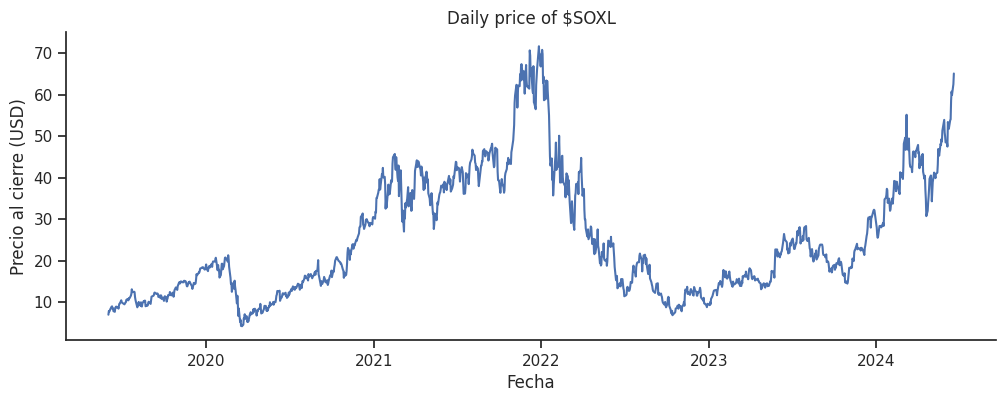

In [6]:
# @title Análisis gráfico.

#Sugerencia https://www.sergilehkyi.com/es/2018/10/tips-on-working-with-datetime-index-in-pandas/

import seaborn as sns
from matplotlib import pyplot as plt

# Estilo de Seaborn
sns.set(style="ticks")

# Trama usando Seaborn
plt.figure(figsize=(12, 4))
sns.lineplot(data=filtered_soxl_df['Close'])
plt.title('Daily price of $SOXL')
plt.ylabel("Precio al cierre (USD)")
plt.xlabel("Fecha")

# Quitar bordes superior y derecho
sns.despine(right=True, top=True)
#plt.show()

first_observation = filtered_soxl_df.head(1)
last_observation = filtered_soxl_df.tail(1)

soxl_growth = (last_observation["Close"].iloc[0] / first_observation["Close"].iloc[0] - 1 )* 100
print("Desde los últimos 5 años, el valor del índice ha crecido", round(soxl_growth, 2), "%")


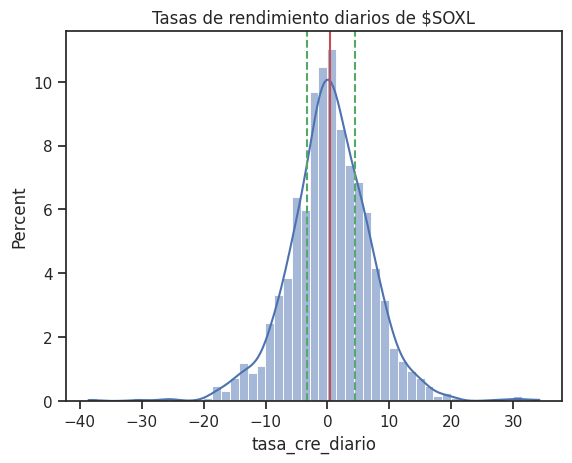

Las estadísticas muestran que en promedio siempre es esperable una tasa positiva


,Open,High,Low,Close,Volume,tasa_cre_diario
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1270.000000
mean,25.265833,26.100837,24.326261,25.260907,43.633165,0.398236
std,14.680029,15.122367,14.114027,14.659245,34.573127,6.626110
min,4.126502,4.834594,3.491506,4.173491,2.637000,-38.592955
25%,13.767436,14.194133,13.124978,13.679882,14.139600,-3.377653
50%,20.191105,21.110470,19.513273,20.247986,37.044000,0.385363
75%,37.210392,38.613175,35.887453,37.089245,64.487500,4.384877
max,72.685362,72.822749,68.298929,71.625557,284.532700,34.257608


In [7]:
# Ahora, me interesa ver la distribución de los crecimientos diarios

# Calcular la diferencia entre cada elemento y el anterior
filtered_soxl_df['tasa_cre_diario'] = filtered_soxl_df['Close'].diff() / filtered_soxl_df['Close'].shift(1) * 100
filtered_soxl_df.head()

# Crear un histograma usando seaborn
sns.histplot(filtered_soxl_df['tasa_cre_diario'], kde=True, stat = "percent")
plt.title('Tasas de rendimiento diarios de $SOXL')

# Agregar una línea vertical en0.377ediana y en los quantiles
plt.axvline(x=0.398, color='r', linestyle='-')
plt.axvline(x=-3.377, color='g', linestyle='--')
plt.axvline(x=4.384, color='g', linestyle='--')

# Mostrar el gráfico
plt.show()

print("Las estadísticas muestran que en promedio siempre es esperable una tasa positiva")
filtered_soxl_df.describe()

Ahora es más claro ver las diferencias alrededor del 0


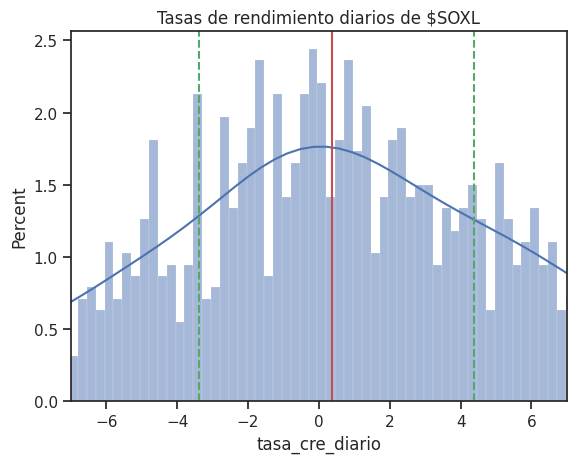

Además, es importante ver que el 52.2 % de los días, el valor de $SOXL aumenta, por lo que se vuelve relevante para saber cuando entrar a comerciar


In [8]:
# La se observó que la distribución es muy "picuda", por lo que para ver mejor la dsitribución, se limita el crecimiento a -5% y 5%
# Calcular la diferencia entre cada elemento y el anterior
filtered_soxl_df['tasa_cre_diario'] = filtered_soxl_df['Close'].diff() / filtered_soxl_df['Close'].shift(1) * 100

filtered_soxl_df['Increases'] = filtered_soxl_df['tasa_cre_diario'].apply(lambda x: 1 if x > 0 else 0)


# Crear un histograma usando seaborn
sns.histplot(filtered_soxl_df['tasa_cre_diario'], kde=True, binwidth= 0.25, stat = "percent")
plt.title('Tasas de rendimiento diarios de $SOXL')

# Agregar una línea vertical en0.377ediana y en los quantiles
plt.axvline(x=0.377, color='r', linestyle='-')
plt.axvline(x=-3.382, color='g', linestyle='--')
plt.axvline(x=4.38, color='g', linestyle='--')

# Limitar el rango del eje x de -7 a 7
plt.xlim(-7, 7)

# Mostrar el gráfico
print("Ahora es más claro ver las diferencias alrededor del 0")
plt.show()


prom_incr_soxl = filtered_soxl_df['Increases'].mean()*100
print("Además, es importante ver que el", round(prom_incr_soxl,1), "% de los días, el valor de $SOXL aumenta, por lo que se vuelve relevante para saber cuando entrar a comerciar")


Nótese que la correlación es muy débil (no hay evidencias de que una subida en el precio ayer, implique una subida hoy)
Sin embargo, por la correlación negativa, pareciera ser que si el día de ayer hubo una subida, el día de hoy debería esperarse una caída del precio de cierre


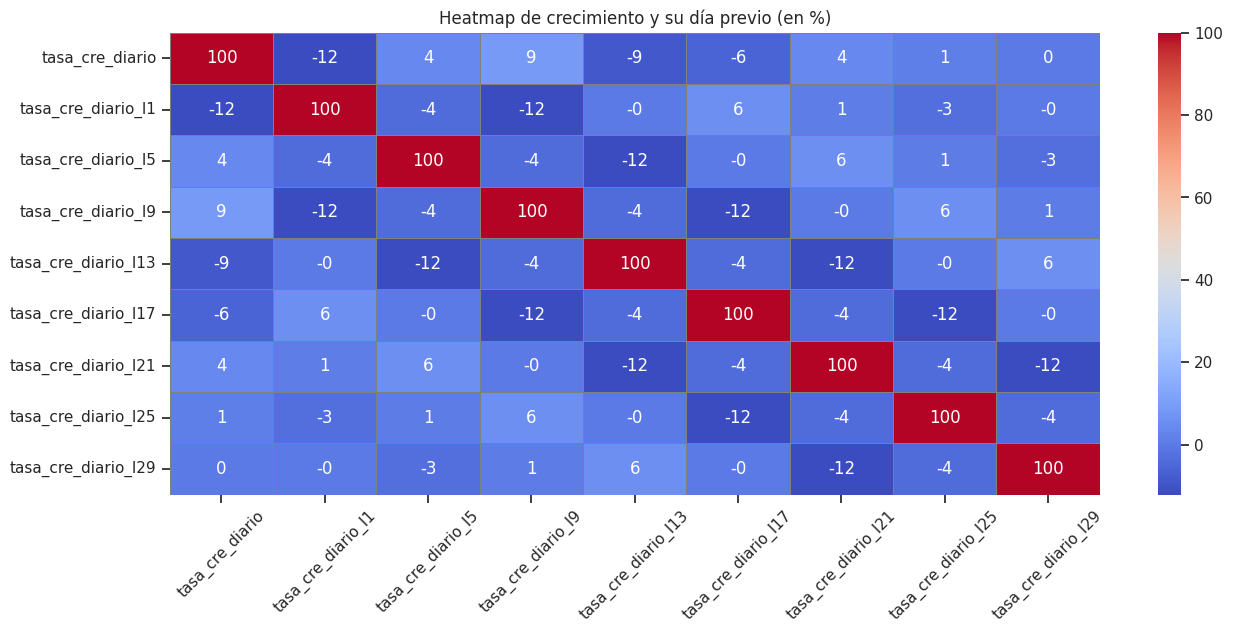

In [9]:
# Veámos si hay persistencia en la serie
tserie_soxl_df = filtered_soxl_df.copy()

# Iterar para crear nuevas columnas con el desplazamiento
for i in range(1, 30, 4):
    new_col_name = f"tasa_cre_diario_l{i}"
    tserie_soxl_df[new_col_name] = tserie_soxl_df['tasa_cre_diario'].shift(i)

tserie_soxl_df = tserie_soxl_df.filter(regex=r'^tasa_cre_diario')
tserie_soxl_corr_matriz = tserie_soxl_df.corr() * 100

# Crear el mapa de calor
plt.figure(figsize=(15, 6))  # Tamaño del gráfico
sns.heatmap(tserie_soxl_corr_matriz, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray', fmt=".0f")

# Ajustes adicionales
plt.title('Heatmap de crecimiento y su día previo (en %)')  # Título del gráfico
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x

# Mostrar el gráfico
print("Nótese que la correlación es muy débil (no hay evidencias de que una subida en el precio ayer, implique una subida hoy)\nSin embargo, por la correlación negativa, pareciera ser que si el día de ayer hubo una subida, el día de hoy debería esperarse una caída del precio de cierre")
plt.show()

En este caso nos sirve estudiar únicamente la primera fija/columa, donde es notable observar como no hay información relevante en el cambio en el Volumen


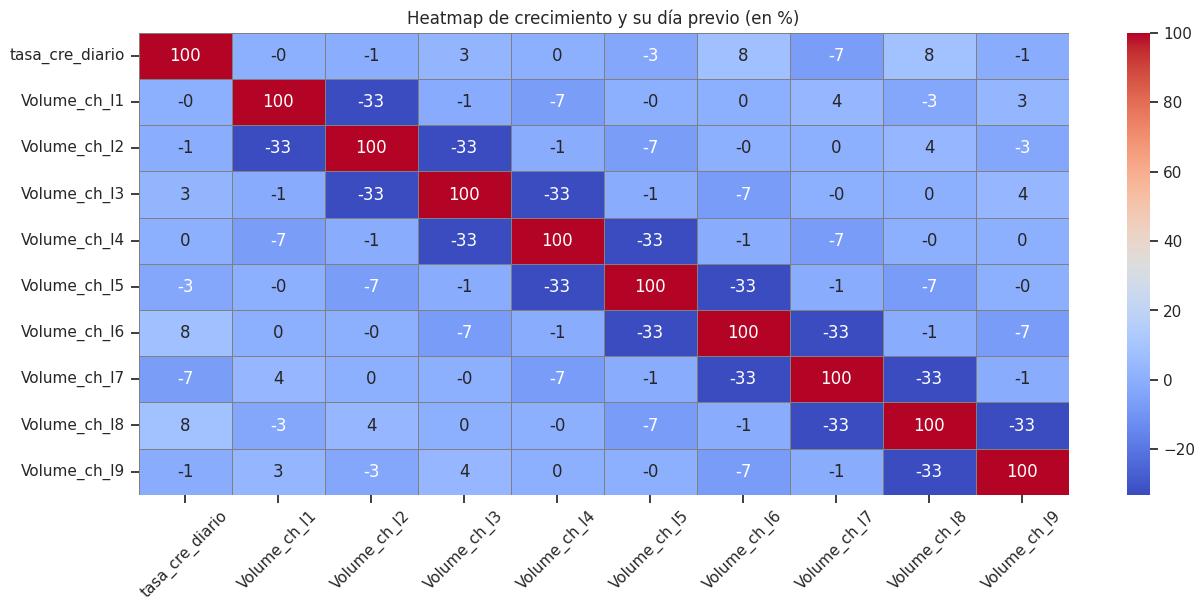

In [10]:
# Ahora veamos si la tendencia de Volumen de transacciones dice algo del cambio de precio
tserie_soxl_df = filtered_soxl_df.copy()

tserie_soxl_df["Volume_Ch"] = filtered_soxl_df['Volume'].diff() / filtered_soxl_df['Volume'].shift(1) * 100
# Iterar para crear nuevas columnas con el desplazamiento
for i in range(1, 10, 1):
    new_col_name = f"Volume_ch_l{i}"
    tserie_soxl_df[new_col_name] = tserie_soxl_df['Volume_Ch'].shift(i)

tserie_soxl_df = tserie_soxl_df.filter(regex=r'^tasa_cre_diario|Volume_ch')
tserie_soxl_corr_matriz = tserie_soxl_df.corr() * 100

# Crear el mapa de calor
plt.figure(figsize=(15, 6))  # Tamaño del gráfico
sns.heatmap(tserie_soxl_corr_matriz, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray', fmt=".0f")

# Ajustes adicionales
plt.title('Heatmap de crecimiento y su día previo (en %)')  # Título del gráfico
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x

# Mostrar el gráfico
print("En este caso nos sirve estudiar únicamente la primera fija/columa, donde es notable observar como no hay información relevante en el cambio en el Volumen")
plt.show()


In [11]:
# @title Análisis Multivariado. Los HOLDINGS de $SOXL

# Como el comportamiento de SOXL no necesariamente depende del nivel de persistencia de la serie, sino que también podría (y de hecho, debe hacerlo) depende de sus posesiones.
# SOXL, al ser un ETF de semiconductores, debería de responder directamente del costo de las acciones de empresas dedicadas a este ramo.
# Las principales empresas de semiconductores son: AMD ($AMD), NVIDIA ($NVDA), Broadcom ($AVGO), Intel ($INTC), MEDIATEK ($2454), Qualcom ($QCOM) y Samsung ($SMSNN)

"""
#Definiendo una función que descargue todos la información de todos los TICKERS
symbols = ["SOXL", "AMD", "NVDA", "AVGO", "INTC", "2454.TW", "QCOM", "SMSN.IL"]

# Dictionary to store DataFrames for each symbol
stock_data = {}

# Loop through each symbol
for symbol in symbols:
    # Fetch historical price data using yfinance
    main_df = yf.Ticker(symbol)
    main_df = main_df.history(period="max")

    # Ensure DateTime index
    main_df.index = pd.to_datetime(main_df.index)

    # Create additional columns
    main_df['Day'] = main_df.index.day
    main_df['Month'] = main_df.index.month
    main_df['Year'] = main_df.index.year
    main_df['DayOfWeek'] = main_df.index.day_name()

    # Filter and rename columns
    main_df = main_df.filter(regex=r'^Close')
    main_df = main_df.rename(columns={"Close": symbol})

    main_df = main_df.loc[main_df.index > '2019-06-01']
    main_df = main_df.loc[main_df.index < '2024-06-20']

    #main_df.index = pd.date_range(start='2019-06-03', periods=len(main_df))

    # Store DataFrame in dictionary
    stock_data[symbol + '_DF'] = main_df

#stock_data
"""

#Mergin dataframes
"""
merged_df = pd.merge(stock_data["SOXL_DF"], stock_data["AMD_DF"], left_index=True, right_index=True, how='left')

merged_df

symbols = ["NVDA", "INTC", "QCOM"]
for symbol in symbols:
  merged_df = pd.merge(merged_df, stock_data[symbol + '_DF'], left_index=True, right_index=True, how='left')

#Note that Samsung and Mediatek were removed because their different coins
merged_df['Day'] = merged_df.index.day
merged_df['Month'] = merged_df.index.month
merged_df['Year'] = merged_df.index.year
merged_df

#Ahora guardo el main_dataframe en un CSV
#from google.colab import drive
#drive.mount('drive')

merged_df.to_csv('data2.csv')
!cp data2.csv "drive/My Drive/"
"""

'\nmerged_df = pd.merge(stock_data["SOXL_DF"], stock_data["AMD_DF"], left_index=True, right_index=True, how=\'left\')\n\nmerged_df\n\nsymbols = ["NVDA", "INTC", "QCOM"]\nfor symbol in symbols:\n  merged_df = pd.merge(merged_df, stock_data[symbol + \'_DF\'], left_index=True, right_index=True, how=\'left\')\n\n#Note that Samsung and Mediatek were removed because their different coins\nmerged_df[\'Day\'] = merged_df.index.day\nmerged_df[\'Month\'] = merged_df.index.month\nmerged_df[\'Year\'] = merged_df.index.year\nmerged_df\n\n#Ahora guardo el main_dataframe en un CSV\n#from google.colab import drive\n#drive.mount(\'drive\')\n\nmerged_df.to_csv(\'data2.csv\')\n!cp data2.csv "drive/My Drive/"\n'

In [14]:
#Descargando la base de reciente creación por si hubiese problemas con yfinance

link_github2 = "https://raw.githubusercontent.com/uzbalz/SOXL-forecast/main/data3.csv"

merged_df = pd.read_csv(link_github2, index_col=0)  # Assuming the first column is the index

# Convert the index to datetime
merged_df.index = pd.to_datetime(merged_df.index, errors='coerce')

# Create a datetime column by combining year, month, and day
merged_df['date'] = pd.to_datetime(merged_df[['Year', 'Month', 'Day']])

# Set the new datetime column as the index
merged_df.set_index('date', inplace=True)

# Drop the original year, month, and day columns if needed
merged_df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

# Check the type of the index
print(type(merged_df.index))

merged_df.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,SOXL,AMD,NVDA,INTC,QCOM
date,,,,,
2019-06-03,6.954780,27.58,3.325305,38.110420,58.815281
2019-06-04,7.837287,29.57,3.554482,39.276714,60.394619
2019-06-05,7.681322,29.50,3.511728,39.066265,59.673409
2019-06-06,8.000401,31.82,3.573869,39.548557,60.180923
2019-06-07,8.251245,32.41,3.616623,40.364079,61.160358


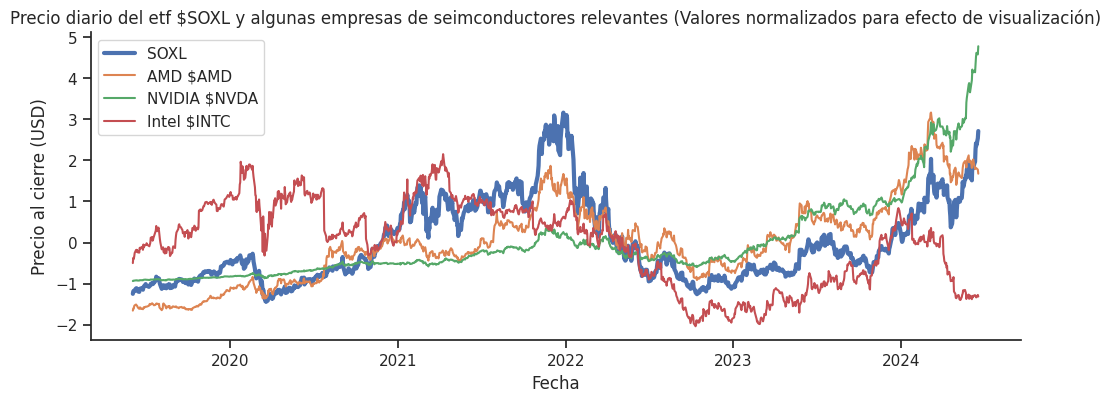

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the dataframe
z_merged_df = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)
z_merged_df.index = merged_df.index #Saving the original index


plt.figure(figsize=(12, 4))
sns.lineplot(data=z_merged_df['SOXL'], label = "SOXL", linewidth = 3)
sns.lineplot(data=z_merged_df['AMD'], label = "AMD $AMD")
sns.lineplot(data=z_merged_df['NVDA'], label = "NVIDIA $NVDA")
sns.lineplot(data=z_merged_df['INTC'], label = "Intel $INTC")
plt.title('Precio diario del etf $SOXL y algunas empresas de seimconductores relevantes (Valores normalizados para efecto de visualización)')
plt.ylabel("Precio al cierre (USD)")
plt.xlabel("Fecha")

# Quitar bordes superior y derecho
sns.despine(right=True, top=True)
plt.show()

Note que restringimos la muestra para ver las correlaciones entre cada acción y el ETF


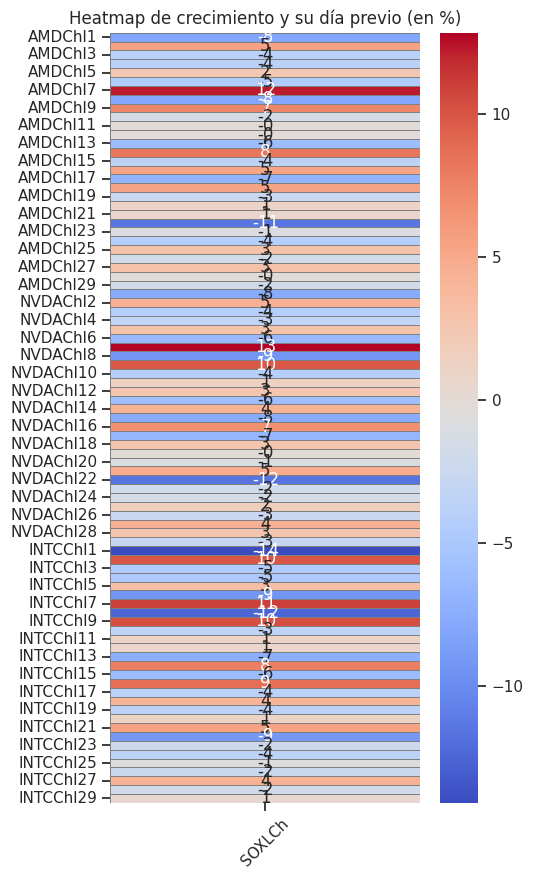

In [17]:
# Ahora veamos si la tendencia de Volumen de transacciones dice algo del cambio de precio
tserie_soxl_df = main_df.copy()

tserie_soxl_df["SOXLCh"] = tserie_soxl_df['SOXL'].diff() / tserie_soxl_df['SOXL'].shift(1) * 100

tserie_soxl_df["AMDCh"] = tserie_soxl_df['AMD'].diff() / tserie_soxl_df['AMD'].shift(1) * 100
tserie_soxl_df["NVDACh"] = tserie_soxl_df['NVDA'].diff() / tserie_soxl_df['NVDA'].shift(1) * 100
tserie_soxl_df["INTCCh"] = tserie_soxl_df['INTC'].diff() / tserie_soxl_df['INTC'].shift(1) * 100
# Iterar para crear nuevas columnas con el desplazamiento
for i in range(1, 30, 1):
    new_col_name = f"AMDChl{i}"
    tserie_soxl_df[new_col_name] = tserie_soxl_df['AMDCh'].shift(i)
for i in range(1, 30, 1):
    new_col_name = f"NVDAChl{i}"
    tserie_soxl_df[new_col_name] = tserie_soxl_df['NVDACh'].shift(i)
for i in range(1, 30, 1):
    new_col_name = f"INTCChl{i}"
    tserie_soxl_df[new_col_name] = tserie_soxl_df['INTCCh'].shift(i)

filtered_columns = [col for col in tserie_soxl_df.columns if 'Chl' in col]
tserie_soxl_df = tserie_soxl_df[['SOXLCh'] + filtered_columns]
tserie_soxl_df

tserie_soxl_corr_matriz = tserie_soxl_df.corr() * 100

# Crear el mapa de calor
plt.figure(figsize=(5, 10))  # Tamaño del gráfico
sns.heatmap(tserie_soxl_corr_matriz[['SOXLCh']].iloc[1:], annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray', fmt=".0f")

# Ajustes adicionales
plt.title('Heatmap de crecimiento y su día previo (en %)')  # Título del gráfico
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x

# Mostrar el gráfico
print("Note que restringimos la muestra para ver las correlaciones entre cada acción y el ETF")
plt.show()

In [19]:
import statsmodels.api as sm

tsreg_series = tserie_soxl_df.dropna(subset=['SOXLCh', 'AMDChl7', "NVDAChl7", "INTCChl7"])

# Fit regression model
X = tsreg_series[['AMDChl7', 'NVDAChl7', 'INTCChl7']]
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(tsreg_series['SOXLCh'], X).fit(cov_type='HC3')

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 SOXLCh   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.592
Date:                Wed, 03 Jul 2024   Prob (F-statistic):            0.00333
Time:                        02:35:30   Log-Likelihood:                -4167.5
No. Observations:                1263   AIC:                             8343.
Df Residuals:                    1259   BIC:                             8364.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3194      0.188      1.696      0.0

In [22]:
tsreg_series_fe

,SOXLCh,AMDChl1,AMDChl2,AMDChl3,AMDChl4,AMDChl5,AMDChl6,AMDChl7,AMDChl8,AMDChl9,...,INTCChl24,INTCChl25,INTCChl26,INTCChl27,INTCChl28,INTCChl29,Month,Year,month,year
date,,,,,,,,,,,,,,,,,,,,,
2019-06-13,1.895938,-0.709656,-2.467649,2.530082,1.854180,7.864406,-0.236725,7.215373,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,2019,6,2019
2019-06-14,-7.924946,-2.454944,-0.709656,-2.467649,2.530082,1.854180,7.864406,-0.236725,7.215373,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,2019,6,2019
2019-06-17,-2.012505,-3.281296,-2.454944,-0.709656,-2.467649,2.530082,1.854180,7.864406,-0.236725,7.215373,...,NaN,NaN,NaN,NaN,NaN,NaN,6,2019,6,2019
2019-06-18,13.044237,-3.820816,-3.281296,-2.454944,-0.709656,-2.467649,2.530082,1.854180,7.864406,-0.236725,...,NaN,NaN,NaN,NaN,NaN,NaN,6,2019,6,2019
2019-06-19,0.195206,4.280822,-3.820816,-3.281296,-2.454944,-0.709656,-2.467649,2.530082,1.854180,7.864406,...,NaN,NaN,NaN,NaN,NaN,NaN,6,2019,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12,8.399492,-0.860665,-4.485613,0.653553,0.367094,3.862737,-2.176703,-2.007185,0.089951,0.974931,...,-2.216429,-0.936387,0.633630,1.278268,0.460979,-0.328187,6,2024,6,2024
2024-06-13,3.644417,0.805233,-0.860665,-4.485613,0.653553,0.367094,3.862737,-2.176703,-2.007185,0.089951,...,0.300001,-2.216429,-0.936387,0.633630,1.278268,0.460979,6,2024,6,2024
2024-06-14,-1.248776,-0.212189,0.805233,-0.860665,-4.485613,0.653553,0.367094,3.862737,-2.176703,-2.007185,...,-0.797606,0.300001,-2.216429,-0.936387,0.633630,1.278268,6,2024,6,2024


In [26]:
#Corriendo un modelo de efectos fijos (para corregir por valor estacionales y de tendencias de tiempo)

import statsmodels.formula.api as smf
tsreg_series_fe = tserie_soxl_df.dropna(subset=['SOXLCh', 'AMDChl7', "NVDAChl7", "INTCChl7"])

tsreg_series_fe['Month'] = tsreg_series_fe.index.month
tsreg_series_fe['Year'] = tsreg_series_fe.index.year
tsreg_series_fe['month'] = pd.Categorical(tsreg_series_fe['Month'])
tsreg_series_fe['year'] = pd.Categorical(tsreg_series_fe['Year'])

# Fit the OLS model + fixed effects
fe_model = smf.ols("SOXLCh ~ C(month) + C(year) + AMDChl7 + NVDAChl7 + INTCChl7", data=tsreg_series_fe).fit(cov_type='HC3')

# Print model summary
print("Imprimiendo la regresión con efectos fijos para corregir por tendencias y efectos estacionales")
print(fe_model.summary())
print("Note que el efecto del valor de las empresas de los semiconductores no son estadísticamente distintas de ceros, por lo que habrá que explorar más variables para incluir en el modelo ")
print("También se buscará indagar con más rezagos y variables macroeconómicas")

Imprimiendo la regresión con efectos fijos para corregir por tendencias y efectos estacionales
                            OLS Regression Results                            
Dep. Variable:                 SOXLCh   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.700
Date:                Wed, 03 Jul 2024   Prob (F-statistic):             0.0304
Time:                        02:39:52   Log-Likelihood:                -4160.0
No. Observations:                1263   AIC:                             8360.
Df Residuals:                    1243   BIC:                             8463.
Df Model:                          19                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

<ipython-input-26-7dc7bd065369>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsreg_series_fe['Month'] = tsreg_series_fe.index.month
<ipython-input-26-7dc7bd065369>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsreg_series_fe['Year'] = tsreg_series_fe.index.year
<ipython-input-26-7dc7bd065369>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat